## The mechanics of learning


1. Model Training Process 
   - Selecting a dataset and defining a model.  
   - Estimating model parameters to improve prediction accuracy.  

2. Error Calculation and Optimization
   - Performing a **forward pass**, where input data is fed into the model to generate predictions.  
   - Measuring **error** by comparing predictions with ground truth labels.  
   - Computing the **gradient** of the error using the chain rule (backward pass).  
   - Updating model parameters to minimize error iteratively.  

3. Learning and Implementation 
   - Initially, the training process will be implemented manually to build intuition.  
   - By the end of the chapter, PyTorch will be used to automate the process.  

By the end of the chapter, you will have a solid grasp of fundamental training techniques and how they apply to deep learning.

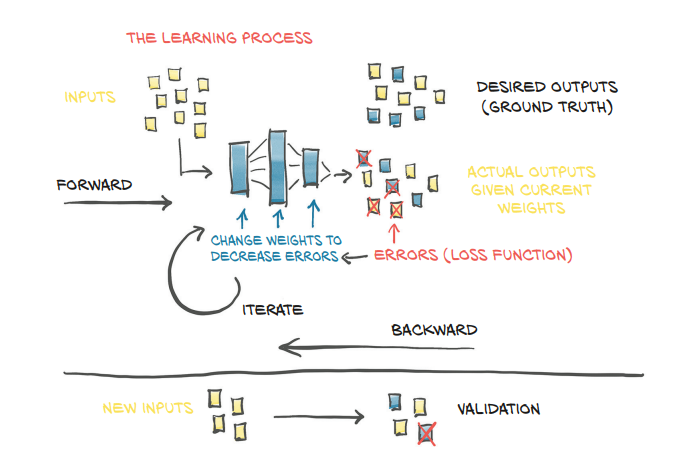


#### **Problem Statement: Understanding an Unknown Thermometer**
- After acquiring an analog thermometer without labeled units, we aim to determine its scale by collecting data and creating a model.  
- The goal is to **build a dataset**, **train a model**, and **estimate parameters** to interpret temperature readings in Celsius.  
- This problem is a **regression task**, where we map unknown temperature readings to Celsius.


#### **Steps to Solve the Problem**
1. **Data Collection & Representation**  
   - Temperature values in **Celsius** (`t_c`) and corresponding thermometer readings in **unknown units** (`t_u`) are recorded over a couple of weeks.  
   - Data is stored as **tensors** in PyTorch for ease of processing.  
   - Some noise is expected due to measurement inaccuracies.

2. **Visualizing the Data**  
   - A **scatter plot** reveals a pattern, suggesting a linear relationship.  
   - Even though we already know a linear model is correct (since the data is fabricated), this serves as a foundational example for understanding model training.
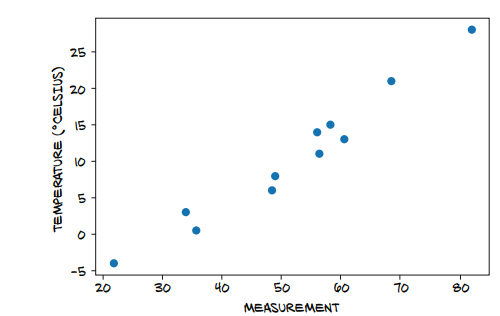


In [39]:
import numpy as np
import torch
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

3. **Choosing a Model**  
   - Given the observed pattern, we assume a **linear relationship** between `t_c` and `t_u`:  
     \[
     t_c = w . t_u + b
     \]  
   - The parameters **w (weight)** and **b (bias)** need to be estimated.

4. **Estimating Model Parameters (w and b)**  
   - The objective is to adjust **w** and **b** so that predictions align with actual Celsius values.  
   - This involves **minimizing the error**, which is measured using a **loss function**.  
   - The loss function should be **high** when predictions are inaccurate and **low** when they closely match the actual values.




#### ** What is a Loss Function?**
- A **loss function** (or cost function) is a numerical measure that quantifies how far the model's predictions are from the actual values.  
- The learning process **aims to minimize this loss** by adjusting model parameters.

#### ** How is Loss Computed?**
- Loss is determined by comparing **predicted outputs** (`t_p`) with **actual values** (`t_c`):  
  \[
  \{Loss} = t_p - t_c
  \]
- The function must ensure that loss is **always positive**, regardless of whether `t_p` is greater or smaller than `t_c`.

#### ** Common Loss Functions**
- Two common choices for measuring loss:
  - **Absolute difference**: \( |t_p - t_c| \)
  - **Squared difference**: \( (t_p - t_c)^2 \)

- **Key differences:**
  - Both functions have a **minimum at zero** and increase **monotonically** as the prediction deviates from the true value.
  - They are **convex functions**, meaning they have a single minimum, making optimization efficient.
  - The **squared difference** behaves more smoothly, as its derivative is well-defined at the minimum, unlike the absolute difference.

#### ** Why Use the Squared Difference?**
- The squared difference has advantages:
  - It penalizes **large errors more heavily** than the absolute difference.
  - It ensures **gradual and stable updates** to model parameters.
  - It helps in **prioritizing smaller errors** over large outliers, leading to a more stable training process.

#### ** Practical Considerations**
- While **convex loss functions** are easy to optimize, **deep neural networks** often have loss functions that are not convex.
- In this chapter, a simpler method is used to introduce optimization, but in deep learning, more complex algorithms are needed for optimization.

## Implementing the Model in PyTorch

In [40]:
def model(t_u, w, b):
    return w * t_u + b

t_u: Input temperature values in unknown units.
w: Weight (scaling factor).
b: Bias (offset).
PyTorch's broadcasting ensures tensor operations are handled correctly.

### The Mean Squared Error (MSE) loss function

In [41]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()


Computes element-wise squared differences between predicted (t_p) and actual (t_c) values.
Averages the squared differences to return a scalar loss value.

### Initializing Parameters and Computing Predictions

In [42]:
w = torch.ones(())
b = torch.zeros(())
#() (empty tuple) specifies that the tensor should have zero dimensions, meaning it's a scalar (a single number rather than an array).

In [43]:
# predict the value
t_p = model(t_u, w, b)
#Calculating the Initial Loss
loss = loss_fn(t_p, t_c)


***Next Steps: Optimizing the Model***

Now that the model and loss function are implemented, the next challenge is optimizing the parameters **(w and b)** to minimize the loss.

The first approach will be manual updates, followed by leveraging PyTorch's optimization tools.


##  Introduction to Gradient Descent
- The goal is to **optimize the model parameters (`w` and `b`)** to minimize the **loss function**.  
- The **gradient descent algorithm** helps achieve this by iteratively adjusting the parameters in the direction that reduces loss.  
- While there are more efficient ways to solve this simple problem, **gradient descent scales well to deep learning models** with millions of parameters.


#### **Building Intuition: The Knob Analogy**
- Imagine a machine with two knobs labeled **w** and **b**, and a screen showing the **loss value**.  
- The objective is to **turn the knobs** in a way that decreases the loss.  
- Observations:
  - If the loss decreases, we keep adjusting in that direction.  
  - If the loss starts increasing, we reverse direction.  
  - As we get closer to the minimum, we **make finer adjustments** to avoid overshooting.



#### ** Implementing Gradient Descent**
- **Step 1: Estimating the Rate of Change (Gradient)**
  - The gradient of the loss with respect to **w** is calculated using a **finite difference approximation**:
  - This measures how much the loss changes when **w** increases slightly.



In [44]:
#numerical derivative (gradient) of the loss function with respect to each parameter
delta = 0.1
loss_rate_of_change_w = (
    loss_fn(model(t_u, w + delta, b), t_c) -
    loss_fn(model(t_u, w - delta, b), t_c)
) / (2.0 * delta)


- **Step 2: Updating the Parameters**
  - The learning rate (`learning_rate`) controls how much we adjust `w`:   

In [45]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

In [46]:
loss_rate_of_change_b = (
    loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c)
) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b


#### **4. Key Concepts in Gradient Descent**
- **Gradient**: Measures how much the loss changes for small adjustments in `w` and `b`.
- **Learning Rate (`learning_rate`)**: A small scaling factor that ensures gradual updates to prevent overshooting the minimum.
- **Iterative Process**: The updates are repeated until the loss converges to a minimum.



**Limitations of Finite Differences**
- The previous approach estimated gradients by evaluating the loss at slightly different values of **w** and **b** using a small delta (e.g., 0.1).  
- This method **does not scale well** for models with many parameters because:
  - It requires multiple evaluations of the model and loss function.
  - Choosing an appropriate **delta** is difficult—too large and we lose precision, too small and we risk numerical instability.


**The Concept of Analytical Derivatives**
- Instead of probing the loss function numerically, we **compute exact derivatives using calculus**.  
- **Key Idea:** Make the step size **infinitesimally small** to get a precise **gradient vector**, which tells us the direction of the steepest loss reduction.  
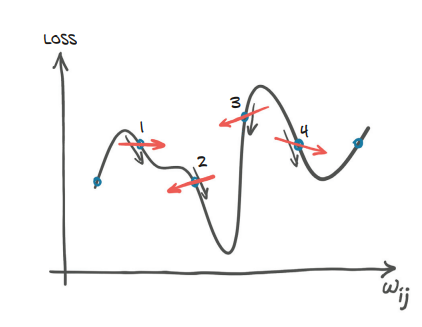


#### **. Computing the Derivatives Using the Chain Rule**
- The **gradient** is computed using the chain rule:  
 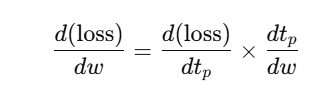
  - The first term measures how the loss changes with respect to predictions.  
  - The second term measures how predictions change with respect to model parameters.  

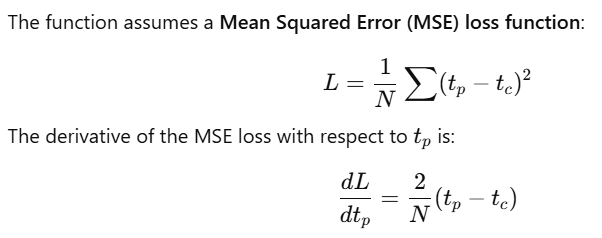

In [47]:
#Derivative of the Loss Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


#The derivative is computed as:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs
#t_p.size(0) represents the batch size (number of elements).



  - This follows from the derivative rule:  
    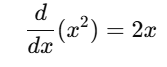

In [48]:
# Derivative of the Model Function
def model(t_u, w, b):
    return w * t_u + b

#Its derivatives with respect to w and b are:
def dmodel_dw(t_u, w, b):
    return t_u  # Since d(w * t_u) / dw = t_u

def dmodel_db(t_u, w, b):
    return 1.0  # Since d(b) / db = 1


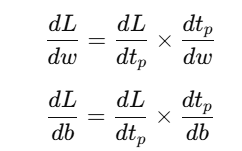

In [49]:
# Computing the Gradient Vector
#To compute the gradient of the loss function with respect to both parameters
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])


- **dloss_dtp:** Computes how the loss changes with predictions.
- **dloss_dw:** Computes how the loss changes with w.
- **dloss_db:** Computes how the loss changes with b.
- **torch.stack([dloss_dw.sum(), dloss_db.sum()]):** Combines the gradients into a single vector, representing the overall gradient.

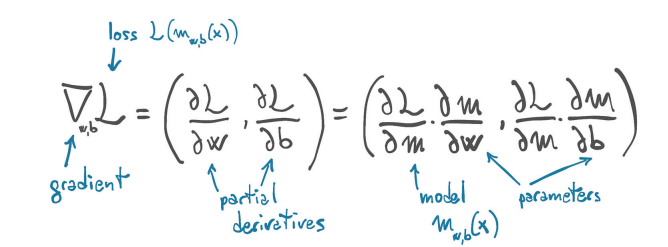

### Iterating to Fit the Model Using Gradient Descent

*** The Training Process***
- Now that we have a model and gradient function, we can **iteratively update** the parameters (`w` and `b`) to minimize the loss.  
- Updates continue for **a fixed number of iterations (epochs)** or until the parameters stabilize.


*** Understanding the Training Loop***
- **Epoch**: A full iteration where parameters are updated using all training samples.
- The training loop is implemented as:
  
- The loop:
  - Computes **predictions**.
  - Evaluates the **loss**.
  - **Computes gradients** for parameter updates.
  - Updates **w and b** using **gradient descent**.

In [50]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)  # Forward pass
        loss = loss_fn(t_p, t_c)  # Compute loss
        grad = grad_fn(t_u, t_c, t_p, w, b)  # Compute gradients
        params = params - learning_rate * grad  # Update parameters
        print('grad:',grad)
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print("*"*50)
    return params



***Instability Due to Large Learning Rate**
- When running the training loop with a **learning rate of 0.01**, the model **diverges** instead of converging:
- Observations:
  - The **loss explodes** and reaches `inf` after a few epochs.
  - This happens because **updates are too large**, causing parameters to oscillate and overshoot the optimal values.
  - The optimization process is **unstable**, where large steps prevent convergence.


In [51]:
training_loop(n_epochs=100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)


grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 1763.884644
**************************************************
grad: tensor([-261257.4062,   -4598.9707])
Epoch 2, Loss 5802484.500000
**************************************************
grad: tensor([15109614.0000,   266155.6875])
Epoch 3, Loss 19408033792.000000
**************************************************
grad: tensor([-8.7385e+08, -1.5393e+07])
Epoch 4, Loss 64915909902336.000000
**************************************************
grad: tensor([5.0539e+10, 8.9023e+08])
Epoch 5, Loss 217130559820791808.000000
**************************************************
grad: tensor([-2.9229e+12, -5.1486e+10])
Epoch 6, Loss 726257512784183951360.000000
**************************************************
grad: tensor([1.6904e+14, 2.9776e+12])
Epoch 7, Loss 2429183416467662896627712.000000
**************************************************
grad: tensor([-9.7764e+15, -1.7221e+14])
Epoch 8, Loss 8125122549611731432050262016.000000
*************

tensor([nan, nan])

*** Fixing the Divergence: Using a Smaller Learning Rate**
- To stabilize training, the **learning rate is reduced to 0.0001 (1e-4)**:  
- Observations:
  - **Loss decreases gradually**, leading to stable training.
  - Updates to parameters are **small and controlled**.
  - Loss reduces from **1763.88 → 29.02**, showing slow but steady improvement.

  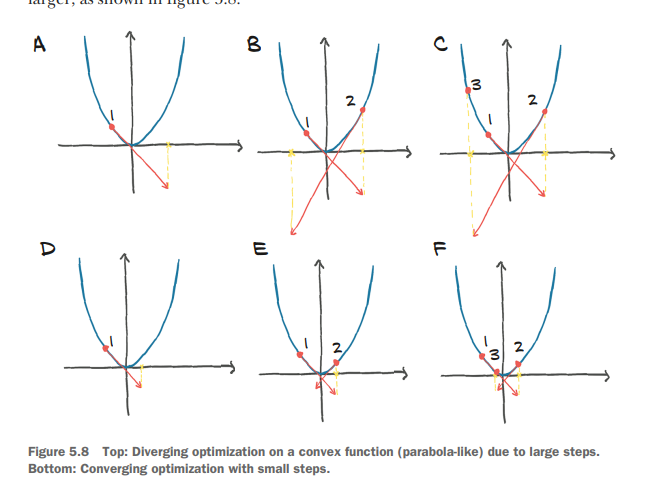


In [ ]:
training_loop(n_epochs=100, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)
#CN::::: when yuo use a smaller learning rate, the model will converge more slowly, but it may also be more stable and less likely to overshoot the minimum of the loss function.
#If you use a larger learning rate, the model may converge faster, but it may also overshoot the minimum and oscillate around it or even diverge.
#The choice of learning rate depends on the specific problem and the characteristics of the data.
#In practice, you may need to experiment with different learning rates to find the one that works best for your problem.
#You can also use learning rate schedules or adaptive learning rate methods to adjust the learning rate during training.
#These methods can help improve the convergence speed and stability of the model.
#For example, you can use a learning rate schedule that reduces the learning rate by a factor of 0.1 every 10 epochs.
#Or you can use adaptive learning rate methods such as Adam or RMSprop that adjust the learning rate based on the gradients and the history of the parameters.
#These methods can help improve the convergence speed and stability of the model.
#In summary, the choice of learning rate is important for the convergence and performance of the model.
#You should experiment with different learning rates and use learning rate schedules or adaptive learning rate methods to find the best one for your problem.
#You should also monitor the loss and the gradients during training to ensure that they are decreasing and not exploding or vanishing.

grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 1763.884644
**************************************************
grad: tensor([1859.5492,   35.7843])
Epoch 2, Loss 323.090546
**************************************************
grad: tensor([765.4666,  16.5122])
Epoch 3, Loss 78.929634
**************************************************
grad: tensor([315.0790,   8.5787])
Epoch 4, Loss 37.552845
**************************************************
grad: tensor([129.6733,   5.3127])
Epoch 5, Loss 30.540283
**************************************************
grad: tensor([53.3495,  3.9682])
Epoch 6, Loss 29.351158
**************************************************
grad: tensor([21.9303,  3.4148])
Epoch 7, Loss 29.148882
**************************************************
grad: tensor([8.9964, 3.1869])
Epoch 8, Loss 29.113848
**************************************************
grad: tensor([3.6721, 3.0930])
Epoch 9, Loss 29.107145
**************************************************
grad: tensor([1

tensor([ 0.2327, -0.0438])


*** Trade-offs of a Small Learning Rate***
- Although the training is **now stable**, progress is **slow**.
- Loss **stalls** because updates are too small.
- A potential solution is to use an **adaptive learning rate**:
  - This adjusts the learning rate **based on gradient magnitudes**.
  - More advanced **optimization algorithms** (like **Adam, RMSprop**) implement this approach.
  - These will be discussed later in the chapter.


### Normalizing Inputs for Stable Training

***Problem: Unequal Gradient Magnitudes**
- The gradient for the weight (`w`) is **much larger** than the gradient for the bias (`b`).
- This imbalance creates an issue:
  - A learning rate large enough for **meaningful updates to `w`** would cause **instability for `b`**.
  - A learning rate small enough for **stable updates to `b`** would make changes to **`w` too slow**.
- One solution is to have **separate learning rates for each parameter**, but this becomes impractical for large models.

***Solution: Input Normalization**
- Instead of modifying the learning rates, a **simpler approach** is to normalize the input data.
- **Scaling inputs** keeps gradients within a similar range, preventing large imbalances.
- In this case, we scale `t_u` (temperature in unknown units) by multiplying it by **0.1**:
  ```python
  t_un = 0.1 * t_u
  ```
- This keeps values roughly between **-1.0 and 1.0**, which helps stabilize training.

#### Training with Normalized Inputs**
- Running the training loop with the **normalized input** and **learning rate = 0.01**:



In [15]:
t_un = 0.1 * t_u
training_loop(
      n_epochs=100,
      learning_rate=1e-2,
      params=torch.tensor([1.0, 0.0]),
      t_u=t_un,
      t_c=t_c
  )
  

grad: tensor([-77.6140, -10.6400])
Epoch 1, Loss 80.364342
**************************************************
grad: tensor([-30.8623,  -2.3864])
Epoch 2, Loss 37.574917
**************************************************
grad: tensor([-12.4631,   0.8587])
Epoch 3, Loss 30.871077
**************************************************
grad: tensor([-5.2218,  2.1327])
Epoch 4, Loss 29.756193
**************************************************
grad: tensor([-2.3715,  2.6310])
Epoch 5, Loss 29.507149
**************************************************
grad: tensor([-1.2492,  2.8241])
Epoch 6, Loss 29.392456
**************************************************
grad: tensor([-0.8071,  2.8970])
Epoch 7, Loss 29.298828
**************************************************
grad: tensor([-0.6325,  2.9227])
Epoch 8, Loss 29.208717
**************************************************
grad: tensor([-0.5633,  2.9298])
Epoch 9, Loss 29.119413
**************************************************
grad: tensor([-0.5355,

tensor([ 2.7553, -2.5162])

 
- **Results**:
  - The **loss decreases** steadily without diverging.
  - The **gradients remain balanced**, allowing a single learning rate to work effectively.



#### Effectiveness of Normalization
- Even though this problem is simple, **normalization is crucial for larger and more complex models**.
- Normalization **improves convergence** by preventing one parameter from dominating updates.
- In real-world deep learning, techniques like **batch normalization** and **standardization** further improve stability.

**Running Training for 5,000 Epochs**
- To **ensure full convergence**, training is extended to **5,000 iterations**:
  

In [16]:
params = training_loop(
      n_epochs=5000,
      learning_rate=1e-2,
      params=torch.tensor([1.0, 0.0]),
      t_u=t_un,
      t_c=t_c,
  )

grad: tensor([-77.6140, -10.6400])
Epoch 1, Loss 80.364342
**************************************************
grad: tensor([-30.8623,  -2.3864])
Epoch 2, Loss 37.574917
**************************************************
grad: tensor([-12.4631,   0.8587])
Epoch 3, Loss 30.871077
**************************************************
grad: tensor([-5.2218,  2.1327])
Epoch 4, Loss 29.756193
**************************************************
grad: tensor([-2.3715,  2.6310])
Epoch 5, Loss 29.507149
**************************************************
grad: tensor([-1.2492,  2.8241])
Epoch 6, Loss 29.392456
**************************************************
grad: tensor([-0.8071,  2.8970])
Epoch 7, Loss 29.298828
**************************************************
grad: tensor([-0.6325,  2.9227])
Epoch 8, Loss 29.208717
**************************************************
grad: tensor([-0.5633,  2.9298])
Epoch 9, Loss 29.119413
**************************************************
grad: tensor([-0.5355,

- **Final results**:
  - Loss stabilizes at **2.9276**.
  - Parameters converge to:
    ```python
    tensor([5.3671, -17.3012])
    ```
  - These values **closely resemble** the conversion formula from **Fahrenheit to Celsius** (`w = 5.5556, b = -17.7778`).
  - **Conclusion**: Our thermometer was displaying **Fahrenheit** all along, proving that **gradient descent optimization works**!

### Visualizing

Matplotlib is building the font cache; this may take a moment.


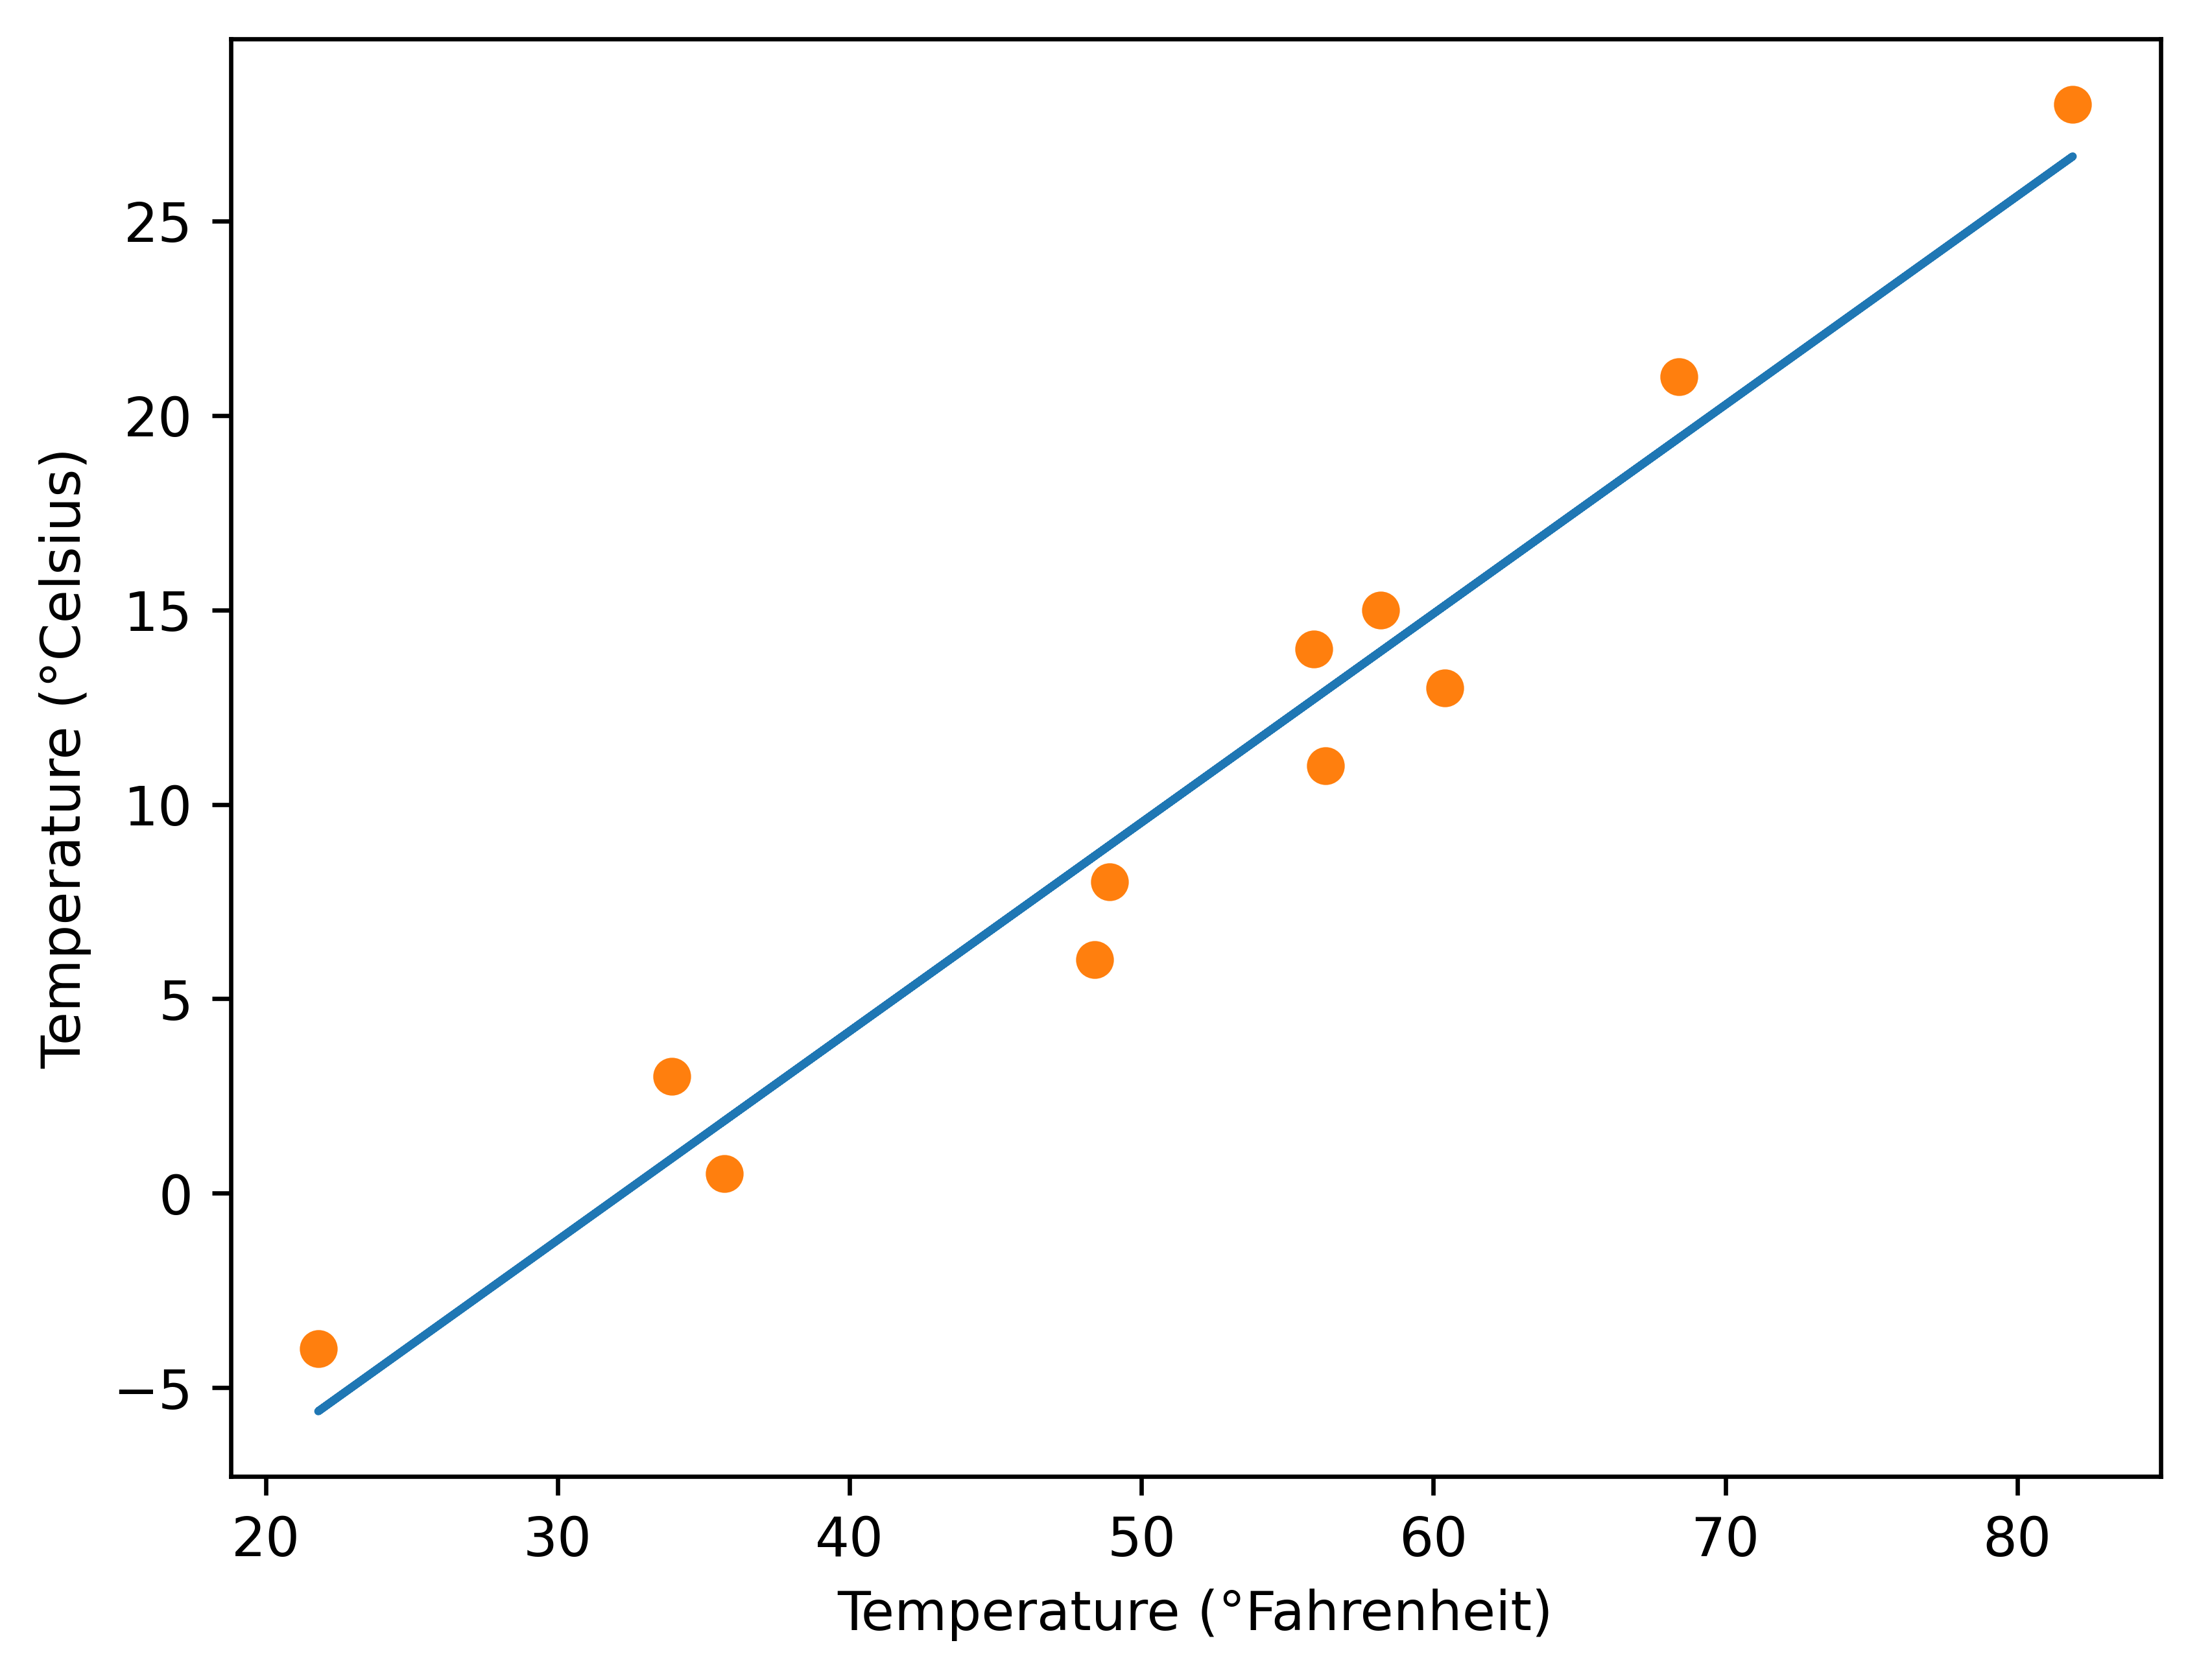

In [18]:
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## PyTorch’s autograd: Backpropagating all things

To simplify this process, PyTorch provides autograd, an automatic differentiation system. PyTorch tensors can track their computation history and automatically compute the chain of derivatives. 

This means we don’t have to manually compute gradients—PyTorch does it for us.

How Autograd Works


In [19]:
def model(t_u, w, b):
    return w * t_u + b


In [20]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [21]:
#initialize the parameters and enable gradient tracking:

params = torch.tensor([1.0, 0.0], requires_grad=True)


The requires_grad=True argument ensures that PyTorch tracks operations involving params so that gradients can be computed.

In [22]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()  # Computes gradients
print(params.grad)  # Outputs tensor containing gradients


tensor([4517.2964,   82.6000])


- Calling .backward() on the loss triggers automatic differentiation.
- PyTorch traces the computation graph in reverse to compute gradients.
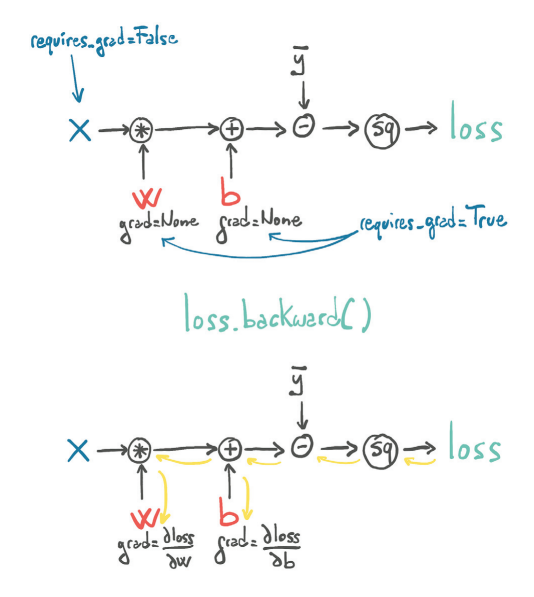

In PyTorch, when we enable requires_grad=True for a tensor, it tracks all operations performed on it. When we call .backward(), PyTorch computes gradients through the computation graph and accumulates them in the grad attribute of the leaf tensors.

***Key Concept: Gradients Accumulate, Not Overwrite***
One common mistake is assuming that calling .backward() replaces the previous gradient values. It does not! Instead, PyTorch adds the new gradients to the existing ones. This means that if .backward() is called multiple times (as in training loops), gradients will keep accumulating, leading to incorrect updates.

In [23]:
#To prevent this issue, we must explicitly reset gradients to zero before each new gradient computation:

if params.grad is not None:
    params.grad.zero_()


### Training Loop with Autograd

In [24]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()  # Reset gradients before computing new ones
        
        t_p = model(t_u, *params)  # Forward pass
        loss = loss_fn(t_p, t_c)   # Compute loss
        loss.backward()  # Compute gradients

        with torch.no_grad():  # Prevents tracking operations in the computation graph
            params -= learning_rate * params.grad  # Update parameters

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss.item()}')

    return params


**Why Use torch.no_grad()?**
- When we update params, we do not want PyTorch to track these operations for gradient computation.
- Wrapping updates inside with torch.no_grad(): ensures that the computation graph is not

## Optimizers
In our previous examples, we manually updated model parameters using vanilla gradient descent. However, when dealing with complex models, PyTorch provides built-in optimizers that abstract away this process and make training more efficient

***PyTorch’s Optimizer Module (torch.optim)***
PyTorch has an optim submodule that includes various optimization algorithms, such as:

+ SGD (Stochastic Gradient Descent)
+ Adam
+ Adagrad
+ RMSprop, and more.

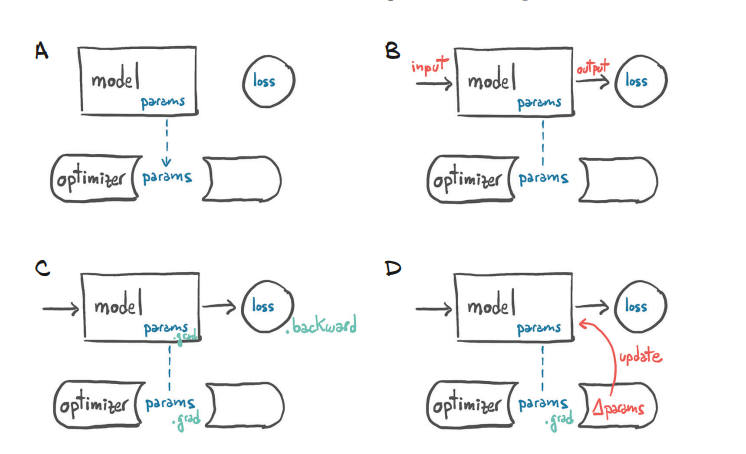

***Each optimizer requires:***

+ A list of parameters (PyTorch tensors with requires_grad=True).
+ A learning rate (lr).
+ Optional hyperparameters (e.g., momentum for SGD).

**Instead of manually updating parameters, we define an optimizer and let it handle updates:**


In [25]:
import torch.optim as optim

# Define parameters
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2

# Initialize optimizer
optimizer = optim.SGD([params], lr=learning_rate)


In [26]:
t_p = model(t_u, *params)   # Forward pass
loss = loss_fn(t_p, t_c)    # Compute loss

optimizer.zero_grad()       # Reset gradients
loss.backward()             # Compute gradients
optimizer.step()            # Update parameters


- **zero_grad()**: Resets gradients before the next step (prevents accumulation issues).
- **backward()**: Computes gradients using autograd.
- **step()**: Updates parameters using the optimizer's strategy.

**Training Loop with an Optimizer**

In [27]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)  # Forward pass
        loss = loss_fn(t_p, t_c)   # Compute loss
        
        optimizer.zero_grad()      # Reset gradients
        loss.backward()            # Compute gradients
        optimizer.step()           # Update parameters
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss.item()}')

    return params


***OTHER OPTIMIZERS***

The Adam optimizer is an advanced optimization algorithm that adapts the learning rate for each parameter. Unlike SGD, Adam is less sensitive to parameter scaling, meaning we can even use non-normalized input data and a higher learning rate without performance issues.

#### Switching to Adam

In [28]:
import torch.optim as optim

# Define parameters
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1  # Higher learning rate

# Use Adam optimizer
optimizer = optim.Adam([params], lr=learning_rate)

# Train the model using the same training loop
training_loop(
    n_epochs=2000,
    optimizer=optimizer,
    params=params,
    t_u=t_u,  # Non-normalized input
    t_c=t_c
)


Epoch 500, Loss 7.612898349761963
Epoch 1000, Loss 3.0866994857788086
Epoch 1500, Loss 2.928579807281494
Epoch 2000, Loss 2.9276442527770996


tensor([  0.5367, -17.3021], requires_grad=True)

###  Training, Validation, and Overfitting**

When building machine learning models, we must ensure that they generalize well beyond the training data. This is why we **split our dataset** into two parts:
1. **Training Set** – Used to fit the model.
2. **Validation Set** – Used to check how well the model generalizes.

**Why Do We Need a Validation Set?**
Johannes Kepler understood the importance of validating models on **independent observations**—a principle that still applies today in machine learning. If a model is too flexible (like deep neural networks), it might **memorize** training data instead of learning general patterns. This is called **overfitting**.

- **Overfitting** happens when a model **performs well on training data** but fails on unseen data.
- To detect overfitting, we **evaluate loss** on both the training and validation sets.

### **Evaluating Training Loss**
- If **training loss decreases**, the model is learning from the data.
- If **training loss stays high**, the model is too simple to capture the data's patterns (underfitting).
- If **training loss is low but validation loss is high**, the model is overfitting.

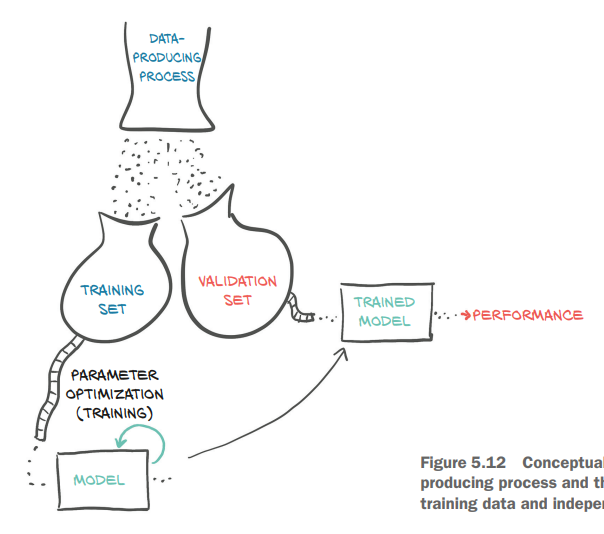


### Generalizing to the Validation Set 

When training a machine learning model, we need to ensure it **generalizes well** beyond the training data. This is where the **validation set** comes in.

### **What Happens If Validation Loss Doesn't Decrease?**
- If **training loss decreases** but **validation loss stays high or increases**, it means the model is memorizing the training data instead of learning general patterns. 
- This phenomenon is called **overfitting**.
- **Rule 2: If training and validation loss diverge, we are overfitting.**

### **Understanding Overfitting**
Overfitting occurs when a model becomes too **complex**, fitting the training data perfectly but failing to generalize. For example:
- A **very large neural network** or a **piecewise polynomial function** might produce a function that twists and turns to pass through every data point but behaves unpredictably on unseen data.

### **How to Reduce Overfitting?**
1. **Collect More Data** – The more data we have, the better the model can learn the true pattern.
2. **Regularization** – Add penalties to the loss function to discourage overly complex models.
3. **Data Augmentation** – Add noise to input samples to force the model to generalize.
4. **Simpler Model** – Use fewer parameters so the model focuses on general trends rather than memorizing data.

### **Balancing Model Complexity**
The key trade-off in deep learning is between:
- **Underfitting** (model too simple, cannot learn patterns).
- **Overfitting** (model too complex, memorizes training data).

To find the right balance:
1. **Increase model complexity until it fits the training data well.**
2. **Reduce complexity until validation loss stops increasing.**

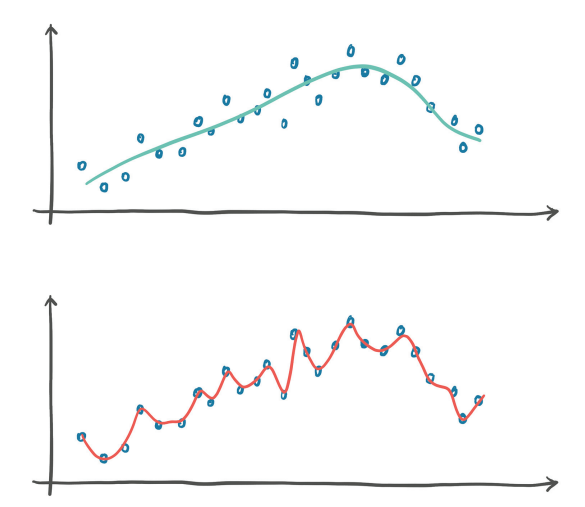

### Split a Dataset in PyTorch

In [29]:
import torch

n_samples = t_u.shape[0]  # Total number of samples
n_val = int(0.2 * n_samples)  # 20% for validation
shuffled_indices = torch.randperm(n_samples)  # Shuffle indices

train_indices = shuffled_indices[:-n_val]  # Training set indices
val_indices = shuffled_indices[-n_val:]  # Validation set indices


In [30]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Normalize inputs
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


#### Updating the Training Loop


In [31]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()  # Compute gradients on training set only
        optimizer.step()  # Update model parameters

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params


* We do not backpropagate on the validation set (val_loss.backward()) since it is only for evaluation.
* We expect validation loss to be slightly higher than training loss because the model is optimized specifically for training data.
* Overfitting occurs if validation loss starts increasing while training loss continues to decrease.

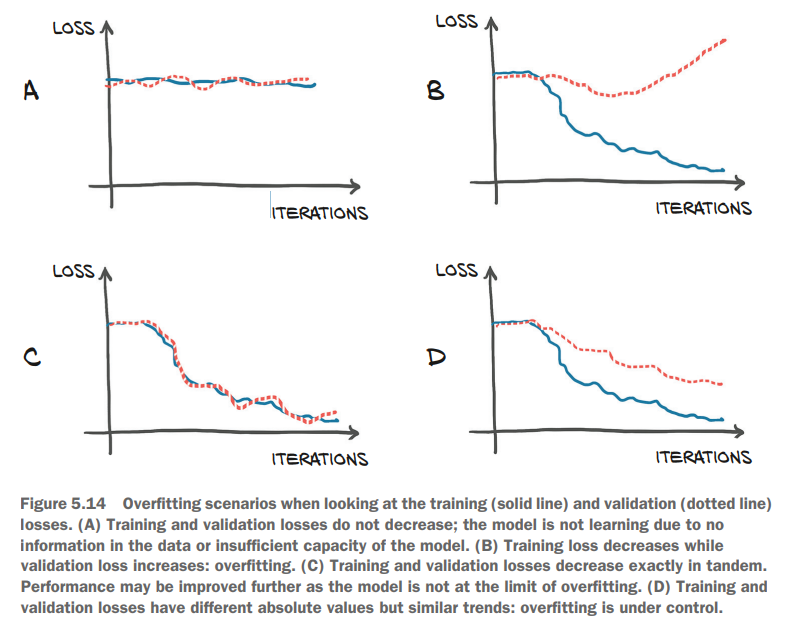

#### Autograd nits and switching it off

**Why We Only Call .backward() on Training Loss**
In our training loop, we compute loss for both the training and validation sets, but we only call .backward() on train_loss. This ensures that:

- ***Gradients are only computed from training data.***
- ***Validation loss remains independent, serving only to evaluate the model.***
Since PyTorch creates separate computation graphs for train_loss and val_loss, calling .backward() on train_loss does not affect validation data.

*** What Happens If We Call .backward() on val_loss?***
If we mistakenly call .backward() on val_loss, we would:

- Accumulate gradients from both training and validation data.
- Effectively train on the entire dataset, defeating the purpose of validation.
- Potentially overfit, since validation data should remain unseen during training.

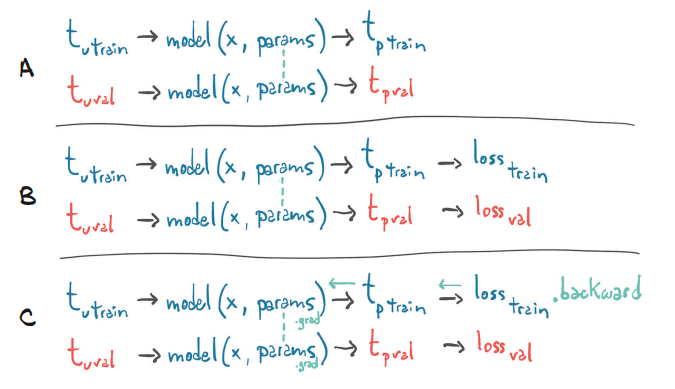

In [32]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

Instead of always using torch.no_grad(), we can conditionally enable or disable autograd based on whether we’re in training or inference mode:

In [33]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):  # Enables autograd only during training
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss
